Estudio del *dataset* de HuHu:

In [11]:
# DATOS: https://sites.google.com/view/huhuatiberlef23/huhu ***HAY QUE CITARLO APROPIADAMENTE*** #

### IMPORTS ###
import pandas as pd
import numpy as np
import pathlib as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [12]:
### GOOGLE DRIVE ###
from google.colab import drive
drive.mount('/content/drive')

PATH = "/content/drive/My Drive/TFM/Data/HuHu/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
### PARTICIÓN ###
df = pd.read_csv(PATH + "train.csv",  sep=',', on_bad_lines='skip', encoding='utf-8', encoding_errors='ignore', index_col=False)
df = df[['tweet', 'prejudice_woman', 'prejudice_lgbtiq', 'prejudice_inmigrant_race', 'gordofobia']]
df = df.rename(columns={"tweet": "Text", "prejudice_woman": "Label1", "prejudice_lgbtiq": "Label2", "prejudice_inmigrant_race": "Label3", "gordofobia": "Label4"})
df.fillna(" ", inplace=True)

X_train = df['Text']
y_train = pd.DataFrame({'Label1':df['Label1'], 'Label2':df['Label2'], 'Label3':df['Label3'], 'Label4':df['Label4']})

X_train, X_aux, y_train, y_aux = train_test_split(X_train, y_train, test_size=0.3, random_state=55)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=0.66, random_state=55)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

print('Tamaño conjunto de Entrenamiento:', len(X_train))
print('Tamaño conjunto de Validación:', len(X_val))
print('Tamaño conjunto de Evaluación:', len(X_test))

Tamaño conjunto de Entrenamiento: 1869
Tamaño conjunto de Validación: 272
Tamaño conjunto de Evaluación: 530


# **ESTUDIO TRAINING**

0    959
1    910
Name: Label1, dtype: int64


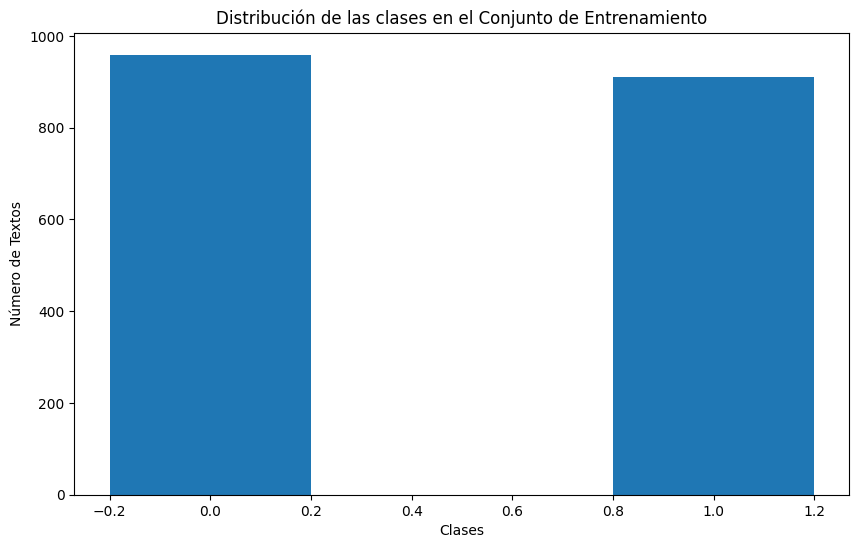

In [14]:
# Análisis de Distribución - Label 1 #
counts = y_train['Label1'].value_counts()
print(counts)

counts_train = y_train['Label1'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

0    1454
1     415
Name: Label2, dtype: int64


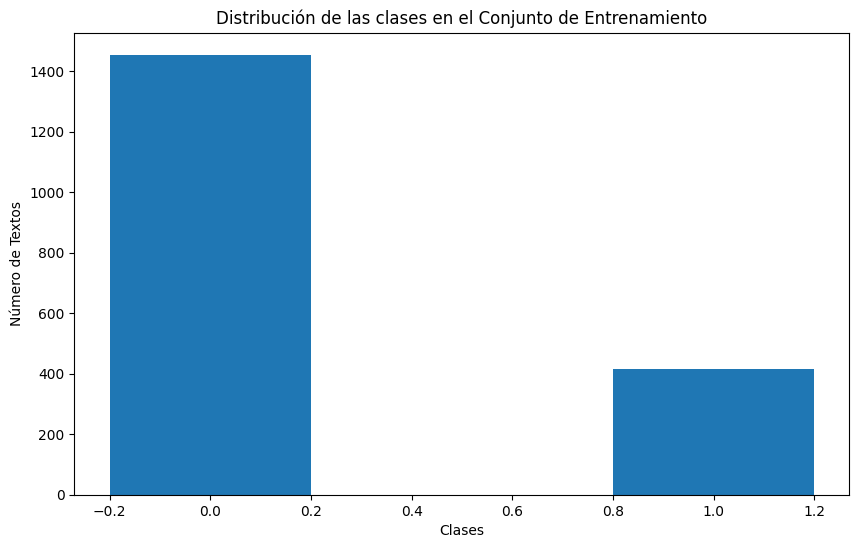

In [15]:
# Análisis de Distribución - Label 2 #
counts = y_train['Label2'].value_counts()
print(counts)

counts_train = y_train['Label2'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

0    1397
1     472
Name: Label3, dtype: int64


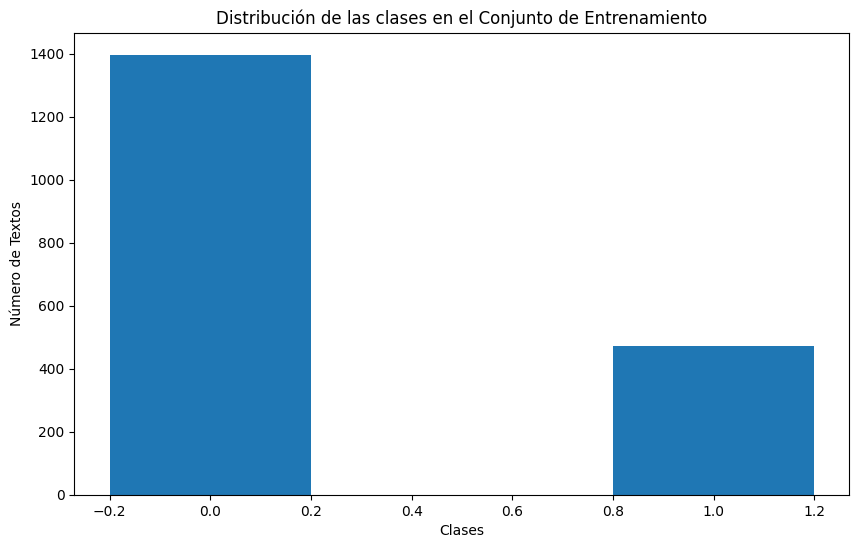

In [16]:
# Análisis de Distribución - Label 3 #
counts = y_train['Label3'].value_counts()
print(counts)

counts_train = y_train['Label3'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

0    1720
1     149
Name: Label4, dtype: int64


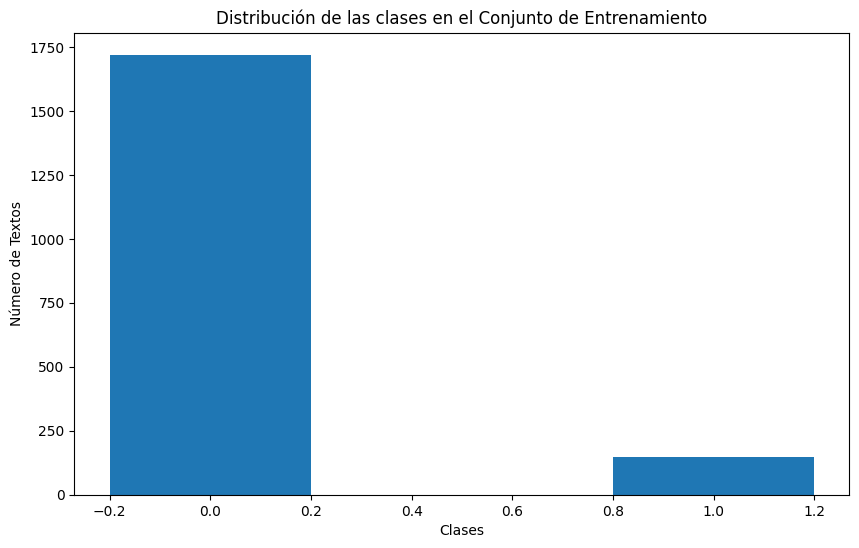

In [17]:
# Análisis de Distribución - Label 4 #
counts = y_train['Label4'].value_counts()
print(counts)

counts_train = y_train['Label4'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

In [18]:
# Análisis de Longitud #
Train_len = X_train.apply(lambda text: len(str(text).split()))
Train_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    1869.000000
mean       23.547887
std        12.972565
min         1.000000
25%        14.000000
50%        20.000000
75%        31.000000
90%        45.000000
95%        50.000000
99%        54.000000
max        60.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

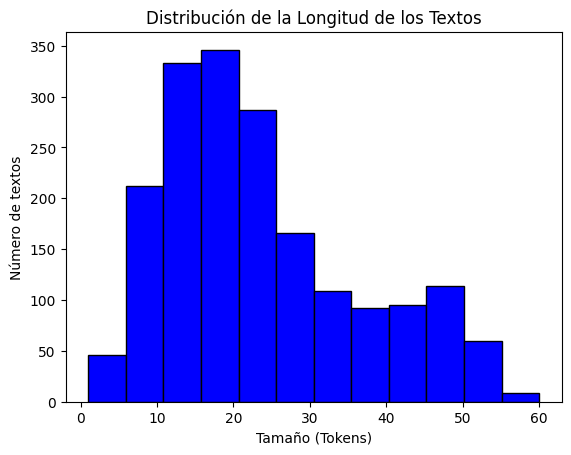

In [19]:
plt.hist(Train_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

# **ESTUDIO VALIDACIÓN**

0    141
1    131
Name: Label1, dtype: int64


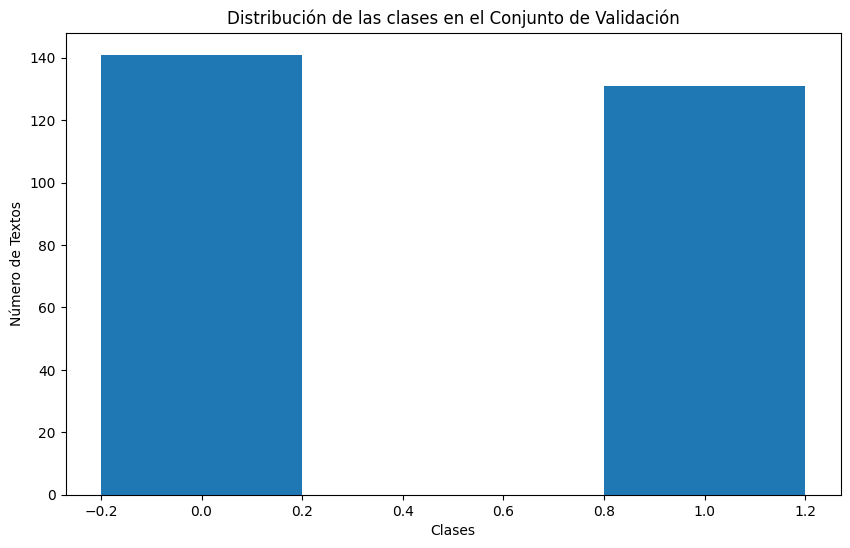

In [20]:
# Análisis de Distribución - Label 1 #
counts = y_val['Label1'].value_counts()
print(counts)

counts_val = y_val['Label1'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

0    213
1     59
Name: Label2, dtype: int64


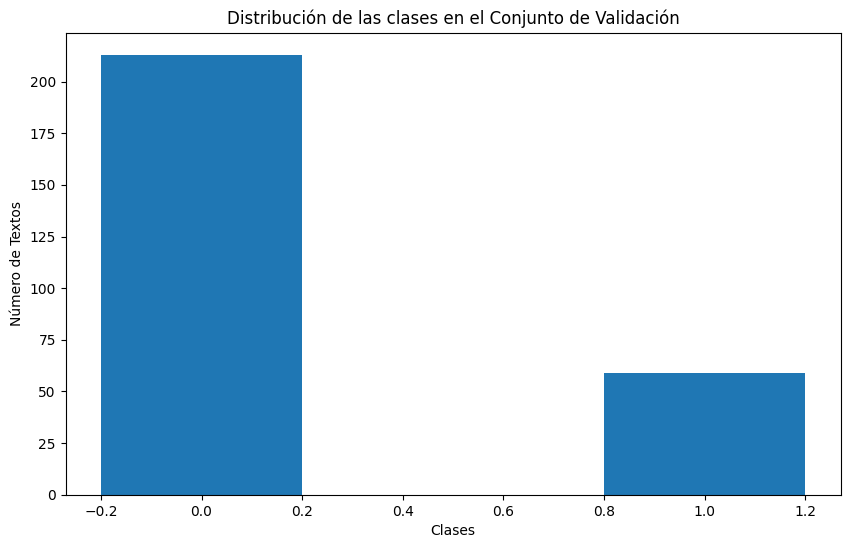

In [21]:
# Análisis de Distribución - Label 2 #
counts = y_val['Label2'].value_counts()
print(counts)

counts_val = y_val['Label2'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

0    203
1     69
Name: Label3, dtype: int64


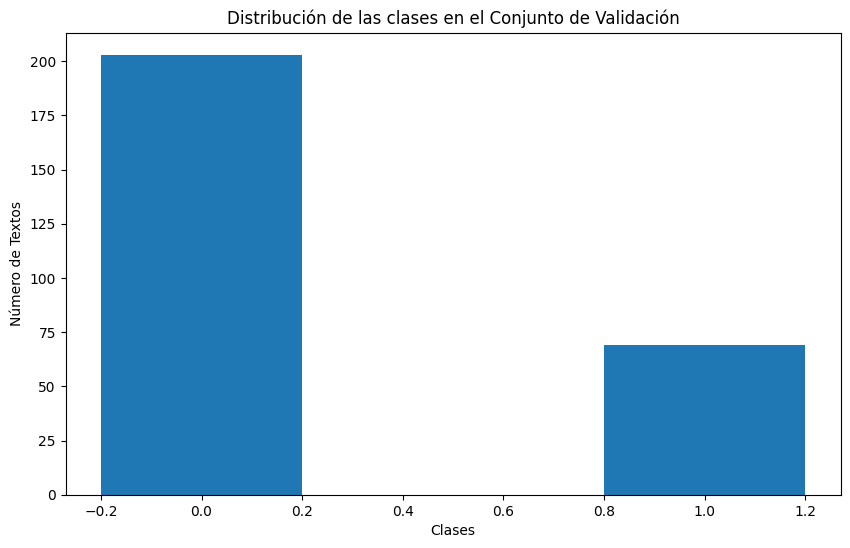

In [22]:
# Análisis de Distribución - Label 3 #
counts = y_val['Label3'].value_counts()
print(counts)

counts_val = y_val['Label3'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

0    249
1     23
Name: Label4, dtype: int64


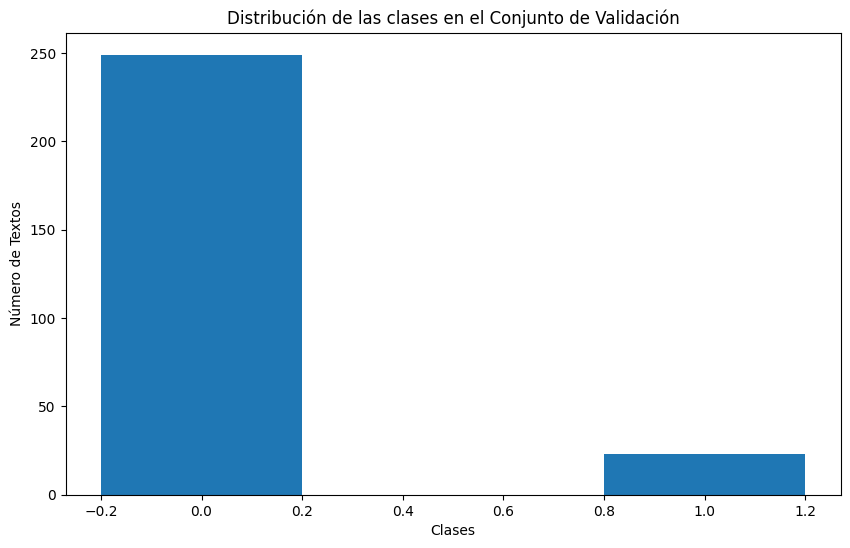

In [23]:
# Análisis de Distribución - Label 4 #
counts = y_val['Label4'].value_counts()
print(counts)

counts_val = y_val['Label4'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

In [24]:
# Análisis de Longitud #
Val_len = X_val.apply(lambda text: len(str(text).split()))
Val_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    272.000000
mean      22.386029
std       12.351325
min        3.000000
25%       13.000000
50%       21.000000
75%       29.000000
90%       42.000000
95%       48.000000
99%       51.290000
max       53.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

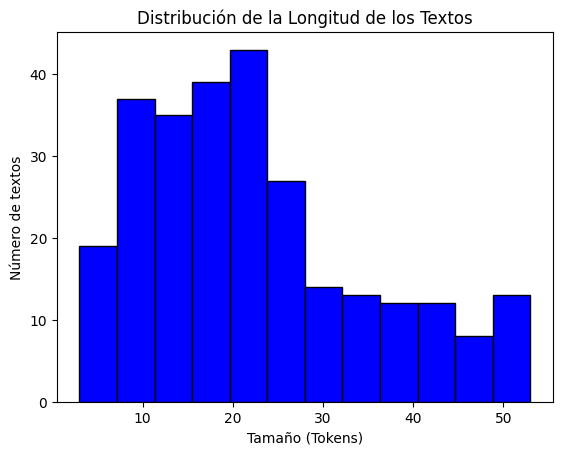

In [25]:
plt.hist(Val_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

# **ESTUDIO TEST**

0    279
1    251
Name: Label1, dtype: int64


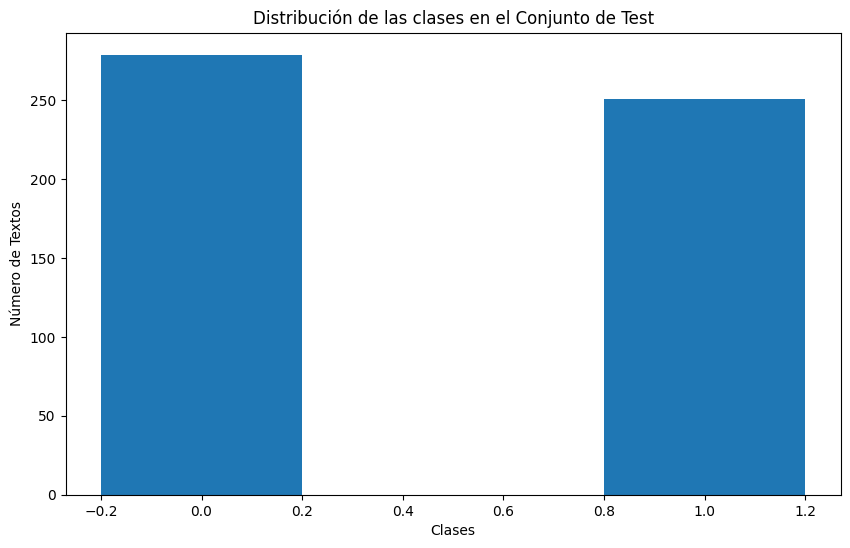

In [26]:
# Análisis de Distribución - Label 1 #
counts = y_test['Label1'].value_counts()
print(counts)

counts_test = y_test['Label1'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

0    397
1    133
Name: Label2, dtype: int64


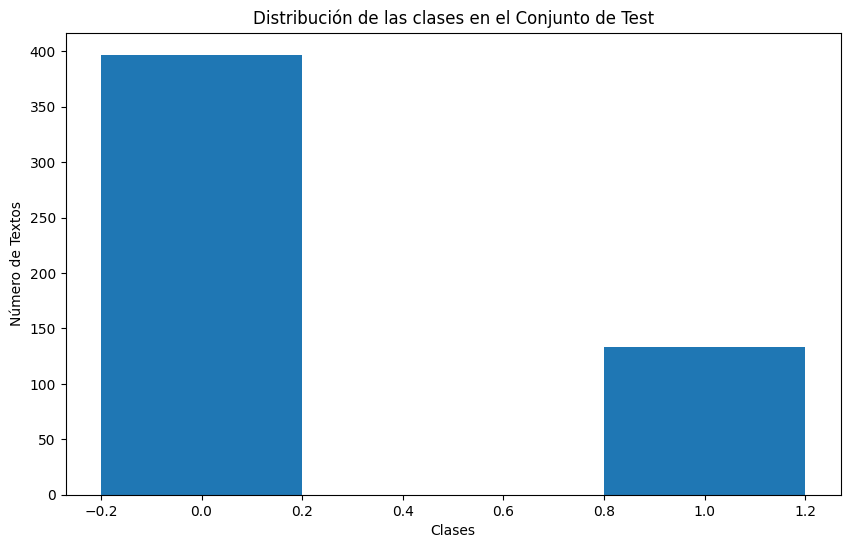

In [27]:
# Análisis de Distribución - Label 2 #
counts = y_test['Label2'].value_counts()
print(counts)

counts_test = y_test['Label2'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

0    407
1    123
Name: Label3, dtype: int64


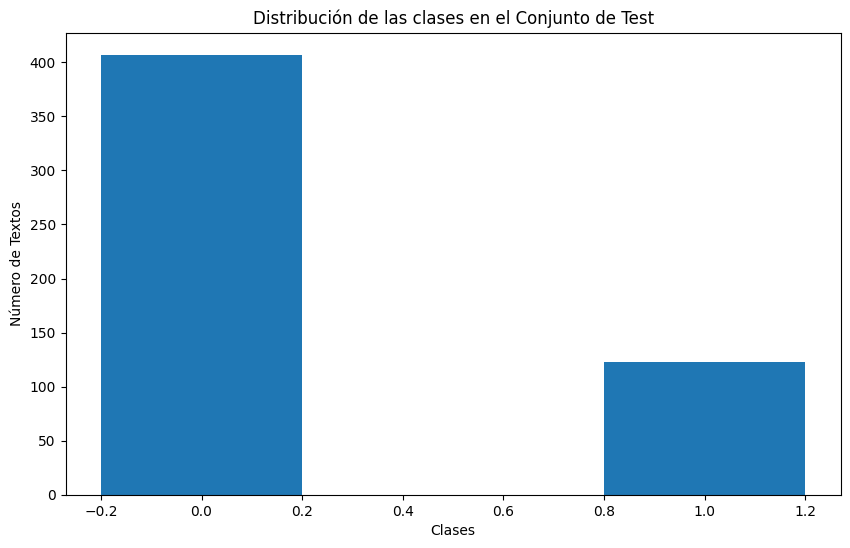

In [28]:
# Análisis de Distribución - Label 3 #
counts = y_test['Label3'].value_counts()
print(counts)

counts_test = y_test['Label3'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

0    488
1     42
Name: Label4, dtype: int64


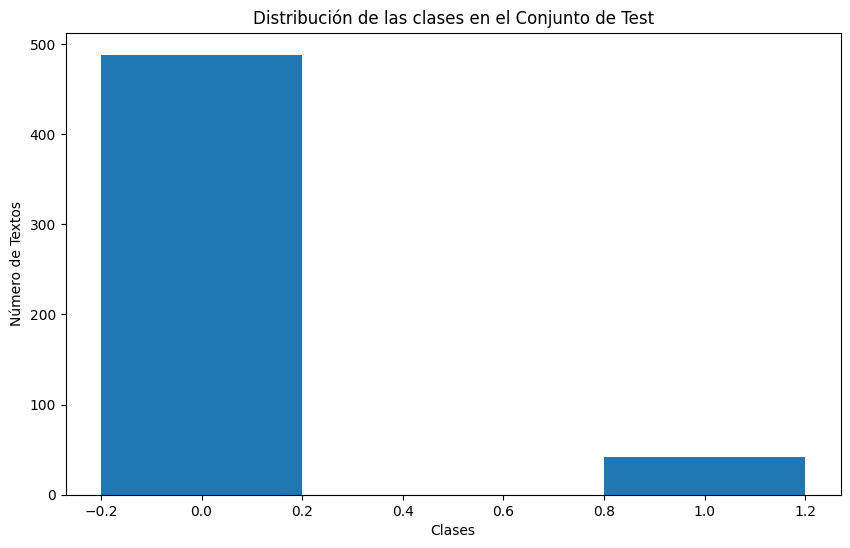

In [29]:
# Análisis de Distribución - Label 4 #
counts = y_test['Label4'].value_counts()
print(counts)

counts_test = y_test['Label4'].value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

In [30]:
# Análisis de Longitud #
Test_len = X_test.apply(lambda text: len(str(text).split()))
Test_len.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    530.000000
mean      22.232075
std       12.323802
min        3.000000
25%       13.000000
50%       20.000000
75%       28.000000
90%       42.000000
95%       48.000000
99%       55.000000
max       57.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

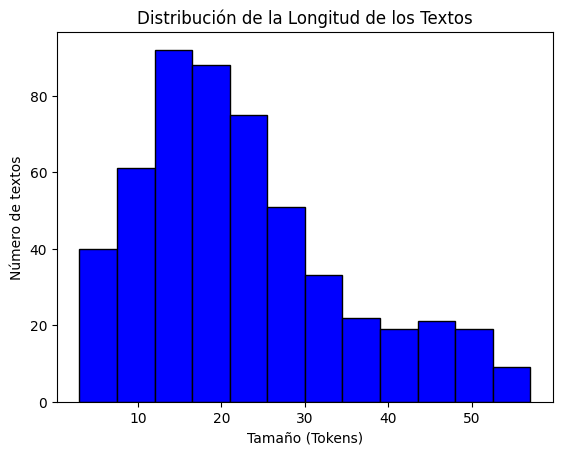

In [31]:
plt.hist(Test_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')